<div class="alert alert-block alert-success">
<b> Key Question </b> 
Now that we know how Newton's theory of gravity works for non-point masses, let's use this theory to see if we can derive Kepler's laws.
</div>

# Orbital Mechanics (Kepler's Laws)
## Angular momentum & central forces (recap of PY2101)
So, now that we know that large bodies can be treated as if they were point masses, what can we derive from it? First let's consider two masses, $M$ and $m$, located at the positions below.

![Setup](Figures/Cartesian_Polar_coords.png)

While the above has the x and y axes labelled, it's far more convenient to work in polar coordinates. Given that

\begin{align}
    \hat{\textbf{r}} &= \cos \theta \hat{\textbf{i}} + \sin \theta \hat{\textbf{j}}\\
    \hat{\pmb{\theta}} &= -\sin \theta \hat{\textbf{i}} + \cos \theta \hat{\textbf{j}}
\end{align}

then we know

\begin{align}
    \hat{\textbf{r}}\cdot\hat{\pmb{\theta}}&=0\\
    \hat{\textbf{r}} \times \hat{\pmb{\theta}}&=\hat{\textbf{k}}
\end{align}

From these definitions, we can derive the following time derivatives:

\begin{align}
    \frac{ {\rm d} \hat{\textbf{r}} } { {\rm d} t} &= \hat{\pmb{\theta}} \frac{ {\rm d } \theta } { {\rm d } t }\\
    \frac{ {\rm d} \hat{\pmb{\theta}} } { {\rm d} t} &= - \hat{\textbf{r}} \frac{ {\rm d } \theta } { {\rm d } t }
\end{align}

The whole point of the above is that the velocity of the planet can then be written as

\begin{align}
    \textbf{v} &= \frac{ {\rm d} \textbf{r}} { {\rm d} t} = \frac{ {\rm d} r } { {\rm d} t} \hat{\textbf{r}} + r \frac{ {\rm d} \hat{\textbf{r}} } { {\rm d} t}\\
     &= v_r \hat{\textbf{r}} + v_t \hat{ \pmb{\theta}}
\end{align}

The angular momentum of the planet is then
$$
    \textbf{L} = \textbf{r} \times \textbf{p}
$$
which, when you take the derivative with respect to time, gives
$$
    \frac{ {\rm d} \textbf{L} }{ {\rm d} t } = \frac{ {\rm d} \textbf{r}}{ {\rm d} t } \times \textbf{p} + \textbf{r} \times \frac{ {\rm d} \textbf{p}}{ {\rm d} t }
$$
using $\textbf{p}=m\textbf{v}$ and $\textbf{F}= m\frac{{\rm d} \textbf{v}}{{\rm d} t}$, we thus get
$$
    \frac{ {\rm d} \textbf{L} }{ {\rm d} t } = m (\textbf{v}\times\textbf{v})+\textbf{r}\times\textbf{F}
$$
The first term has to be 0 (a vector crossed with itself is 0) while for that last term must be zero as $\textbf{F}$ is parallel to $\textbf{r}$. Thus, for any central force
$$
    \frac{ {\rm d} \textbf{L}} {{\rm d} t} = 0
$$

## Kepler's Second Law
So, if angular momentum is convered under gravity, what does that tell us about the orbit of (for example) a planet around a star? The angular momentum of the planet can be written as

\begin{align}
    \textbf{L} &= \textbf{r} \times \textbf{p} \\
    \textbf{L} &= m r v_t \hat{\textbf{k}}
\end{align}

Now imagine a setup like that shown below, where we have a planet moving with a velocity $\textbf{v} = v_r \hat{\textbf{r}} + v_t \hat{ \pmb{\theta}}$. We're interested in how much area is swept out by the orbit of the planet in a time $\Delta t$.
![Planet_Vel](Figures/Planet_velocity.png)
This is given by
$$
    \Delta A \approx \frac{1}{2} r v_t \Delta t + \frac{1}{2} r v_r \Delta t
$$
In the limit where $r>>v_r \Delta t$ (which is true for planets when considering very short timescales), we end up with
$$
    \Delta A \approx \frac{1}{2} r v_t \Delta t
$$
In the limit $t \to 0$ we then get
$$
    \lim_{t \to 0} \frac{\Delta A} {\Delta t} = \frac{{\rm d} A}{{\rm d} t} = \frac{1}{2} r v_t = \frac{L}{2 m}
$$
The important thing about this last term is that both $L$ and $m$ are constants, which means
$$
    \frac{{\rm d} A}{{\rm d} t} = {\rm constant}.
$$
This is Kepler's Second Law.

## Kepler's First Law
The above expressions can be used to state that
$$
    L = r^2 \frac{{\rm d} \theta}{{\rm d} t}
$$
which, following Kepler's Second Law, is constant for any central force. When that force is a gravitational force, we have that
$$
    \textbf{F} = -\frac{GMm}{r^2}\hat{\textbf{r}} = m\frac{{\rm d} \textbf{v}}{{\rm d}t }
$$
Following some simple math (Section 3.1.2 of Ryden & Peterson), we arrive at the following expression
$$
    r = \frac{L^2}{G M m^2 (1+e \cos \theta)}
$$
It can be shown that this expression can be written as
$$
    r = \frac{a(1-e^2)}{1+e \cos \theta}
$$
where $a$ is the semimajor axis of the orbit, $e$ is the eccentricity of the orbit, and $\theta$ is called the "true anamoly".

![Ellipse](Figures/Ellipse_Definitions.png)

As shown below, this is the equation for a conic section.

![Conic_Sections](Figures/Conic_Sections.png)

/tmp/ipykernel_29565/3345462376.py:8: RuntimeWarning: divide by zero encountered in true_divide
  r = 1/(1+e*np.cos(theta))


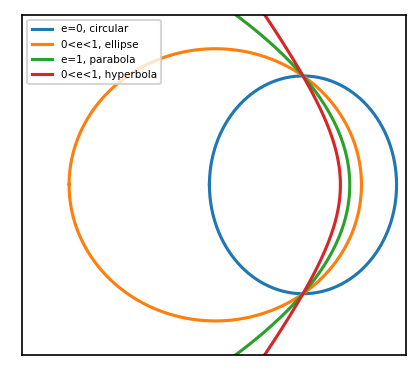

In [75]:
import numpy as np
import matplotlib.pyplot as plt

e = np.array([0.0,0.6,1.0,1.5])
# Polar coordinates
t = np.arange(-np.pi,np.pi,0.01)
theta = np.stack((t,) * 4, axis=-1)
r = 1/(1+e*np.cos(theta))

#Cartesian coordinates
x = r.T*np.cos(theta.T)
y = r.T*np.sin(theta.T)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[3.3,3], dpi=150)
ax.plot(x[0],y[0], label='e=0, circular')
ax.plot(x[1],y[1], label='0<e<1, ellipse')
ax.plot(x[2][np.where((t>-np.pi/1.4) & (t<np.pi/1.4))],y[2][np.where((t>-np.pi/1.4) & (t<np.pi/1.4))], label='e=1, parabola')
ax.plot(x[3][np.where((t>-np.pi/1.4) & (t<np.pi/1.4))],y[3][np.where((t>-np.pi/1.4) & (t<np.pi/1.4))], label='0<e<1, hyperbola')
ax.set_ylim(-3.12/2,3.12/2)
ax.set_xlim(-3.0,1.1)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.legend(fontsize=5)
plt.savefig("Figures/Orbits.png")
plt.show()

This expression allows for 4 types of orbits:

1. A circular orbit ($e=0$).
2. An elliptical orbit ($0<e<1$).
3. A parabolic orbit ($e=1$).
4. A hyperbolic orbit ($e>1$).

As such, we've arrived at a generalisation of Kepler's First Law.

We can use the above expressions to determine what the velocity of the body throughout its orbit is by realising that
$$
    \frac{L^2}{m^2} = GMa(1-e^2)
$$
Knowing that $L=m v_t r$, we get
$$
    r^2 v_t^2 = GMa(1-e^2)
$$
Now, typically the velocity of the body is given by $\textbf{v} = v_r \hat{\textbf{r}} + v_t \hat{ \pmb{\theta}}$ - that is, there's both a radial and a tangential component. However, at perihelion, the velocity is entirely tangential, and we know that the distance between the planet and the Sun is $a(1-e)$. As such, at perihelion, the velocity is given by
$$
    v_{pe} = \left[\frac{GM}{a}\frac{1+e}{1-e}\right]^{1/2}
$$
A similar analysis at aphelion provides us with
$$
    v_{ap} = \left[\frac{GM}{a}\frac{1-e}{1+e}\right]^{1/2}
$$